In [2]:
import sys
sys.path.append(r'C:\Users\lzowe\OneDrive - The City College of New York\CCNY_Course\Applied_Machine_Learning_and_Data_Mining\codes\project-product-price-prediction')

In [3]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from final.feature_extraction.vectorization import text_vectorizaion
from final.dimension_reduction.feature_reduction import dimension_reduction

matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.constrained_layout.use'] = True

# Data preparation for regression

## loading data processed using Tokenizing and tf-idf algorithm

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/DSEI21000-S21/project-product-price-prediction/main/data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")

In [5]:
df.shape

(50000, 34)

In [6]:
df.describe()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,item_name_upper_char_count,item_name_stopword_count,item_name_punctuation_count,item_name_number_count,item_name_after_word_count,item_name_after_char_count,item_name_after_avg_word_len,item_condition_id,shipping,price
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,7.373508e+05,26.583180,150.390920,5.667798,1.876040,12.577260,7.67970,5.850200,0.499880,18.323300,...,4.794540,0.192960,0.414340,0.177680,4.236300,24.381740,5.845573,1.991820,0.376700,108.41749
std,4.251891e+05,28.205148,161.300927,0.782677,5.826971,28.114883,10.36772,8.336725,1.229061,18.691275,...,5.226287,0.463088,0.828128,0.422508,1.535705,8.740065,1.210724,0.896911,0.484564,198.75487
min,1.900000e+01,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.00000
25%,3.726685e+05,8.000000,46.000000,5.210526,0.000000,2.000000,1.00000,1.000000,0.000000,7.000000,...,2.000000,0.000000,0.000000,0.000000,3.000000,18.000000,5.000000,1.000000,0.000000,20.00000
50%,7.353620e+05,17.000000,97.000000,5.642857,0.000000,5.000000,4.00000,3.000000,0.000000,12.000000,...,3.000000,0.000000,0.000000,0.000000,4.000000,25.000000,5.750000,2.000000,0.000000,50.00000
75%,1.102881e+06,34.000000,191.000000,6.020944,1.000000,12.000000,10.00000,8.000000,1.000000,23.000000,...,6.000000,0.000000,1.000000,0.000000,5.000000,32.000000,6.500000,3.000000,1.000000,90.00000
max,1.482519e+06,206.000000,1007.000000,19.600000,178.000000,761.000000,104.00000,308.000000,57.000000,175.000000,...,37.000000,6.000000,12.000000,9.000000,13.000000,42.000000,26.000000,5.000000,1.000000,2009.00000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   train_id                             50000 non-null  int64  
 1   clean_item_description               50000 non-null  object 
 2   item_description_bef_word_count      50000 non-null  float64
 3   item_description_bef_char_count      50000 non-null  float64
 4   item_description_bef_avg_word_len    50000 non-null  float64
 5   item_description_upper_word_count    50000 non-null  float64
 6   item_description_upper_char_count    50000 non-null  float64
 7   item_description_stopword_count      50000 non-null  float64
 8   item_description_punctuation_count   50000 non-null  float64
 9   item_description_number_count        50000 non-null  float64
 10  item_description_after_word_count    50000 non-null  float64
 11  item_description_after_char_

In [32]:
df.clean_item_name.unique().shape

(42039,)

In [32]:
df.head()

,train_id,clean_item_description,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,new tags,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,nastasya every hills lipstick fashion,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,brand new tags taken bag pictures,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"
3,405853,bought calves bit large frowned good condition...,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,...,5.333333,3,Women/Shoes/Boots,Hunter,0,84.0,women,shoes,boots,"(80, 90]"
4,1172086,brand new box size 7youth859womens,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,...,4.000000,1,Women/Shoes/Athletic,Nike,0,56.0,women,shoes,athletic,"(50, 60]"


 ## Feature extraction and dimension selection
 
 For Item-discription feature: <br>
 using Jin's function to, firstly, do feature-extraction, increasing up to 14230 new few features <br>
 secondly, do dimenstion-reduction <br>
 finally, left 100 

In [7]:
df.clean_item_description[12]

'corners bottom great shape lips smells markings inside cleanthere small water mark indicated third photo comes dusting'

In [8]:
description_feature,  description_feature_name = text_vectorizaion(df, text_col = "clean_item_description", 
                                                                   tfidf = True, min_df=10, max_features=100000)

In [9]:
description_feature.shape

(50000, 14230)

In [10]:
data = dimension_reduction(description_feature.toarray(), method = 'SVD', n_comp = 100)

In [11]:
data.shape

(50000, 100)

In [12]:
df_cid = pd.DataFrame(data.copy()) #df for cleaned item description transforming to new features
df_cid.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000323,0.316579,0.226464,-0.093895,-0.145724,-0.160601,-0.003326,-0.018076,0.090897,0.191937,...,-0.004165,-0.001915,0.005156,-0.004427,0.003402,0.000975,-0.007848,-0.016539,0.007052,-0.000803
1,0.000036,0.006363,-0.001485,-0.000308,-0.003072,0.008709,0.000235,-0.001264,-0.002293,0.001756,...,-0.007942,0.002710,-0.012444,0.011321,-0.014860,0.004002,-0.018124,-0.005779,0.001366,0.006714
2,0.000307,0.282559,0.198734,-0.108191,-0.022312,-0.049013,-0.093210,0.013344,-0.023775,0.027206,...,0.010754,-0.017814,-0.016186,0.024929,0.011348,-0.026795,-0.009745,-0.001662,0.014235,-0.008916
3,0.000196,0.087350,-0.138583,-0.028886,-0.007241,-0.041192,-0.030511,0.157933,0.007499,0.001831,...,-0.026663,0.009353,-0.000889,-0.041630,0.009715,0.064725,-0.016397,-0.014795,0.047829,0.022772
4,0.000409,0.407447,0.230953,-0.090666,-0.028013,-0.120191,-0.079090,0.052893,-0.152959,-0.178790,...,-0.001439,-0.005601,-0.018854,0.035623,0.019987,-0.008169,-0.001903,0.008855,0.001607,0.033078


## Concatenating new features df_cid and previous df

In [13]:
df1=df.copy()
df1.drop("clean_item_description", inplace=True,axis=1)
df1.head()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,2.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,5.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,6.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"
3,405853,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,17.0,...,5.333333,3,Women/Shoes/Boots,Hunter,0,84.0,women,shoes,boots,"(80, 90]"
4,1172086,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,5.0,...,4.000000,1,Women/Shoes/Athletic,Nike,0,56.0,women,shoes,athletic,"(50, 60]"


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   train_id                             50000 non-null  int64  
 1   item_description_bef_word_count      50000 non-null  float64
 2   item_description_bef_char_count      50000 non-null  float64
 3   item_description_bef_avg_word_len    50000 non-null  float64
 4   item_description_upper_word_count    50000 non-null  float64
 5   item_description_upper_char_count    50000 non-null  float64
 6   item_description_stopword_count      50000 non-null  float64
 7   item_description_punctuation_count   50000 non-null  float64
 8   item_description_number_count        50000 non-null  float64
 9   item_description_after_word_count    50000 non-null  float64
 10  item_description_after_char_count    50000 non-null  float64
 11  item_description_after_avg_w

In [15]:
df1.shape,df_cid.shape

((50000, 33), (50000, 100))

In [16]:
df_concat=pd.concat([df1,df_cid],axis=1)
df_concat.shape

(50000, 133)

## Using one-hot encoding for category and nominal features

In [35]:
cols_catNnom = ['category_name','brand_name', 'c1', 'c2', 'c3', 'price_bin'] # columns of category and nominal features

In [36]:
from final.feature_encoding.one_hot_encoding import one_hot_encode_feature
df_encode = df_concat
for col in cols_catNnom:
    df_encode, col_encode = one_hot_encode_feature(df_encode, encode_column=col,drop_first=False)
df_encode.shape

(50000, 3043)

In [37]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3043 entries, train_id to price_bin_(90, 100]
dtypes: float64(123), int64(3), object(1), uint8(2916)
memory usage: 187.5+ MB


In [38]:
df_encode.head()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,"price_bin_(25, 30]","price_bin_(30, 40]","price_bin_(40, 50]","price_bin_(5, 10]","price_bin_(50, 60]","price_bin_(500, 2500]","price_bin_(60, 70]","price_bin_(70, 80]","price_bin_(80, 90]","price_bin_(90, 100]"
0,806824,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,772820,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,1423115,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,6.0,...,0,0,0,0,1,0,0,0,0,0
3,405853,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,17.0,...,0,0,0,0,0,0,0,0,1,0
4,1172086,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,5.0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
df_encode[["price"]]

,price
0,15.0
1,22.0
2,54.0
3,84.0
4,56.0
...,...
49995,1609.0
49996,205.0
49997,36.0
49998,20.0


In [39]:
# prepare input X, y
X, y = df_encode.copy().drop(["clean_item_name","train_id","price"],axis=1), df_encode[["price"]] 

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3040 entries, item_description_bef_word_count to price_bin_(90, 100]
dtypes: float64(122), int64(2), uint8(2916)
memory usage: 186.3 MB


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

## Conduct dimension reduction on the dateframe processed by one-hot encoding
skip this step in the first place. <br>
let us see how the regression result looks like. and then determine if the dimension reduction on whole dataset needed, or if use other techniques to avoid overfitting(e.g. adding penalty, using RobustScaler, conducting cross validation).<br>



* log 1: actually can't skip this step, the dimension is too large to run, Exception was raised: MemoryError: Unable to allocate 11.8 GiB for an array with shape (45079, 35000) and data type float64.
Therefore, try conduct PCA again before regression

* log 2: even can't not run PCA due to the large number of features. Try drop clean_item_name instead of encoding it, as it is has very less duplicated items.

* log 3: Since log2 works, skip this step( e.i. 1.5) for now.

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

MemoryError: Unable to allocate 11.8 GiB for an array with shape (45079, 35000) and data type float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

# Regression Model Selection
Proposal:
1. try different regression techniques, and select the best one;
      - DT regressor
      * Ensemble method
      - Adding polynomial items to multiple linear regression? 
      - Tensorflow.Keras
2. focus on the selected one and tuning modelling.(Guessing propably would use Ensemble learning or Keras in the end)<br>
**Based on the our previous experiment so far, our results have both large bias and variance.** Probably need to use more powerful algorithm to improve the bias, and then considering solve overfitting issue?

## Regression Tree

In [61]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score 
def evaluate_dt_regressor(X_train, X_test, y_train, y_test,n_iter,max_depth):
    # the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
    MSE_test=[]
    EVS_test=[]
    R2_test=[]
    MSE_train=[]
    EVS_train=[]
    R2_train=[]
    for i in range(n_iter):
        rg = tree.DecisionTreeRegressor(max_depth=max_depth)
        rg.fit(X_train, y_train)
        y_train_pred = rg.predict(X_train)
        y_pred = rg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        EVS_train.append(explained_variance_score(y_train, y_train_pred))
        R2_train.append(r2_score(y_train, y_train_pred))
        
        MSE_test.append(mean_squared_error(y_test, y_pred))
        EVS_test.append(explained_variance_score(y_test, y_pred))
        R2_test.append(r2_score(y_test, y_pred))
    print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
    print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

In [59]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,1,max_depth=None)

Train score: MSE: 1.4285714285714285e-05 EVS: 0.9999999996453222 R2: 0.9999999996453222
Test score: MSE: 1518.0149666666666 EVS: 0.9597509341702407 R2: 0.9597247130125578


In [57]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,1,max_depth=3)

Train score: MSE: 5529.761399916994 EVS: 0.862710131654324 R2: 0.862710131654324
Test score: MSE: 5266.703109166964 EVS: 0.8602664686025879 R2: 0.8602662135373189


In [58]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,1,max_depth=5)

Train score: MSE: 4003.420124992818 EVS: 0.9006052915952316 R2: 0.9006052915952316
Test score: MSE: 4665.169454009445 EVS: 0.8762296359551806 R2: 0.8762258325964597


In [60]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,10,max_depth=None)

Train score: MSE: 1.4285714285714289e-05 EVS: 0.9999999996453222 R2: 0.9999999996453222
Test score: MSE: 1447.0888900000002 EVS: 0.9616282713543395 R2: 0.9616064916217081


## Ensemble learning

### Random Forest (Bagging) for classification, also for regression

In [67]:
from sklearn.ensemble import RandomForestRegressor
def evaluate_rf_regressor(X_train, X_test, y_train, y_test,n_iter,max_depth,random_state):
    MSE_test=[]
    EVS_test=[]
    R2_test=[]
    MSE_train=[]
    EVS_train=[]
    R2_train=[]
    for i in range(n_iter):
        rg = RandomForestRegressor(max_depth=max_depth, random_state=random_state)
        rg.fit(X_train, y_train)
        y_train_pred = rg.predict(X_train)
        y_pred = rg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        EVS_train.append(explained_variance_score(y_train, y_train_pred))
        R2_train.append(r2_score(y_train, y_train_pred))
        
        MSE_test.append(mean_squared_error(y_test, y_pred))
        EVS_test.append(explained_variance_score(y_test, y_pred))
        R2_test.append(r2_score(y_test, y_pred))
    print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
    print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

rf_regressor turns out very very slow

In [69]:
evaluate_rf_regressor(X_train, X_test, y_train, y_test,1,max_depth=None,random_state=42)

<ipython-input-67-ffee7f25d399>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rg.fit(X_train, y_train)


Train score: MSE: 140.46523226352 EVS: 0.9965138348951917 R2: 0.9965126066298461
Test score: MSE: 881.0608326519765 EVS: 0.976636728581326 R2: 0.976624092207488


#### Check Feature Importance

In [73]:
rg = RandomForestRegressor(max_depth=None, random_state=42)
rg.fit(X_train, y_train)
y_train_pred = rg.predict(X_train)
y_pred = rg.predict(X_test)
MSE_train.append(mean_squared_error(y_train, y_train_pred))
EVS_train.append(explained_variance_score(y_train, y_train_pred))
R2_train.append(r2_score(y_train, y_train_pred))

MSE_test.append(mean_squared_error(y_test, y_pred))
EVS_test.append(explained_variance_score(y_test, y_pred))
R2_test.append(r2_score(y_test, y_pred))
print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

<ipython-input-73-5f5cddb06bbb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rg.fit(X_train, y_train)


NameError: name 'MSE_train' is not defined

In [81]:
importances = rg.feature_importances_
importances.shape

(3040,)

In [82]:
X.shape

(50000, 3040)

 1) price_bin_(500, 2500]          0.744454
 2) price_bin_(200, 500]           0.077655
 3) c2_women's handbags            0.013441
 4) price_bin_(100, 200]           0.013271
 5) brand_name_Chanel              0.010254
 6) price_bin_(90, 100]            0.004868
 7) price_bin_(80, 90]             0.003777
 8) item_name_bef_word_count       0.003528
 9) 46                             0.003271
10) brand_name_Mary Kay            0.003156
11) brand_name_Urban Decay         0.002944
12) price_bin_(70, 80]             0.002915
13) item_name_bef_char_count       0.002271
14) 9                              0.002196
15) price_bin_(60, 70]             0.002192
16) 1                              0.002128
17) 80                             0.002118
18) brand_name_Saint Laurent       0.001976
19) item_name_after_avg_word_len   0.001924
20) 35                             0.001907
21) 83                             0.001814
22) brand_name_Celine              0.001723
23) 94                          

840) brand_name_Mudd                0.000000
841) c2_seasonal décor              0.000000
842) c3_ceramic                     0.000000
843) c3_polo shirt                  0.000000
844) brand_name_Johnson & Johnson   0.000000
845) brand_name_Hunter Boots        0.000000
846) c3_personal care               0.000000
847) category_name_Kids/Boys 2T-5T/Shoes 0.000000
848) brand_name_New Balance         0.000000
849) brand_name_Bioworld            0.000000
850) brand_name_Stila               0.000000
851) category_name_Kids/Toys/Hobbies 0.000000
852) category_name_Kids/Diapering/Diaper Bags 0.000000
853) c3_cosmetic bags               0.000000
854) brand_name_Columbia            0.000000
855) c2_maternity                   0.000000
856) category_name_Women/Women's Handbags/Cosmetic Bags 0.000000
857) category_name_Electronics/Cell Phones & Accessories/Cables & Adapters 0.000000
858) category_name_Women/Athletic Apparel/Other 0.000000
859) brand_name_American Apparel    0.000000
860) brand_na

2968) brand_name_Hawk                0.000000
2969) brand_name_47                  0.000000
2970) brand_name_Heart Soul          0.000000
2971) brand_name_3.1 Phillip Lim     0.000000
2972) brand_name_21men               0.000000
2973) brand_name_% Pure              0.000000
2974) brand_name_HeartSoul           0.000000
2975) c3_clothing & closet storage   0.000000
2976) category_name_Women/Swimwear/Beach Accessories 0.000000
2977) brand_name_J.Crew              0.000000
2978) brand_name_Huggies Pull-Ups    0.000000
2979) category_name_Women/Shoes/Oxfords 0.000000
2980) brand_name_Infinity            0.000000
2981) brand_name_Supra               0.000000
2982) brand_name_Xerox               0.000000
2983) brand_name_Rock & Republic     0.000000
2984) c3_corduroys                   0.000000
2985) brand_name_Susan Graver        0.000000
2986) brand_name_Swaddle Designs     0.000000
2987) brand_name_Ingrid & Isabel     0.000000
2988) brand_name_Rocawear            0.000000
2989) brand_nam

<ipython-input-83-6dde926f3fcd>:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


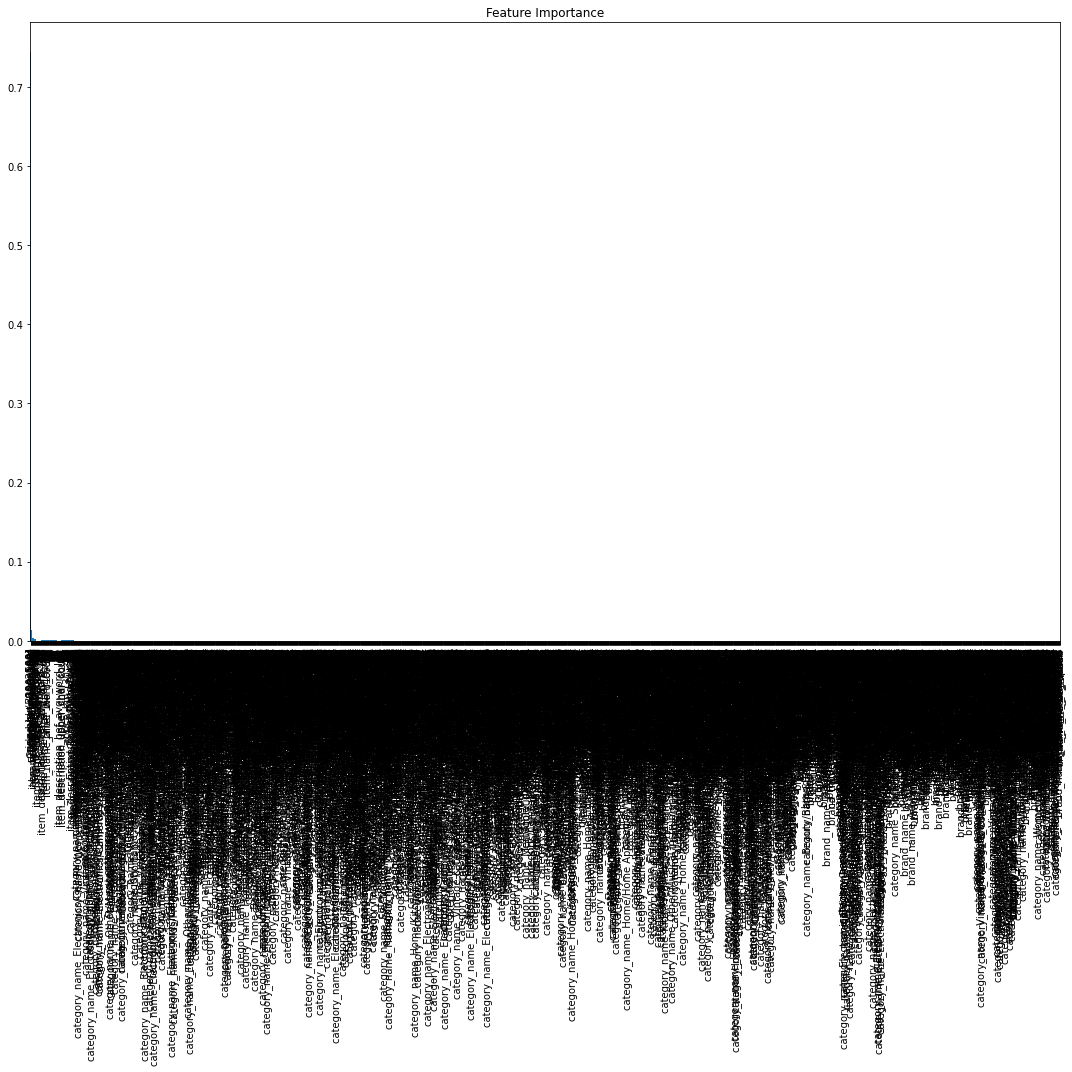

In [83]:
feat_labels = X.columns
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

### Boosting

### Stacking 

## Turning multiple linear regression with polynomial regression

## Tensorflow

In [70]:
import tensorflow as tf
from tensorflow import keras

In [71]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

# Fine tune selected model

## Cross_validation

## validation curve vs learning curve

## Regularization penalty

# make it pipeline and apply to the whole dataset